In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/breast_cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
count = data['diagnosis'].value_counts()

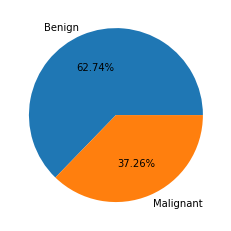

In [ ]:
import matplotlib.pyplot as plt
names = ["Benign","Malignant"]
plt.pie(count.values,labels=names,autopct="%0.2f%%")
plt.show()

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
### Using a Map Function
data["diagnosis_new"] = data['diagnosis'].map({"M":1,"B":0})

In [ ]:
## Using Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["diagnosis_new"] = le.fit_transform(data['diagnosis'])

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_new
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_new'],
      dtype='object')

In [ ]:
col = ['id', 'diagnosis','diagnosis_new','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
data = data.reindex(columns=col)

In [ ]:
data.head()

,id,diagnosis,diagnosis_new,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
### Multi Colinearity Problem
data.corr()
## radius_mean - perimeter_mean,area_mean,concave points_mean,radius_worst,area_worst

,id,diagnosis_new,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis_new,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


In [ ]:
col = ["perimeter_mean","area_mean","concave points_mean","radius_worst","perimeter_worst","area_worst"]
data = data.drop(col,axis=1)

In [ ]:
data.corr()
## texture_mean -  texture_worst

,id,diagnosis_new,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,-0.012968,0.000096,0.050080,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.064720,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis_new,0.039769,1.000000,0.730029,0.415185,0.358560,0.596534,0.696360,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.456903,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.170581,0.506124,0.676764,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.297008,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,-0.023389,0.236702,0.302418,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.912045,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,1.000000,0.659123,0.521984,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.036072,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.659123,1.000000,0.883121,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.248133,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.521984,0.883121,1.000000,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.299879,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
symmetry_mean,-0.022114,0.330499,0.147741,0.071401,0.557775,0.602641,0.500667,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.090651,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.052511,-0.012838,-0.311631,-0.076437,0.584792,0.565369,0.336783,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.051269,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297
radius_se,0.143048,0.567134,0.679090,0.275869,0.301467,0.497473,0.631925,0.303379,0.000111,1.000000,0.213247,0.972794,0.951830,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754,0.194799,0.141919,0.287103,0.380585,0.531062,0.094543,0.049559


In [ ]:
c = data.corr()
filter1 = c['smoothness_mean'] >= 0.8
filter2 = c['smoothness_mean'] <= -0.8
c[filter1 | filter2]
# smoothness_worst

,id,diagnosis_new,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,1.000000,0.659123,0.521984,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.036072,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
smoothness_worst,0.010338,0.421465,0.119616,0.077503,0.805324,0.565541,0.448822,0.426675,0.504942,0.141919,-0.073658,0.130054,0.125389,0.314457,0.227394,0.168481,0.215351,-0.012662,0.170568,0.225429,1.000000,0.568187,0.518523,0.547691,0.493838,0.617624


In [ ]:
c = data.corr()
filter1 = c['compactness_mean'] >= 0.8
filter2 = c['compactness_mean'] <= -0.8
c[filter1 | filter2]
# concavity_mean,compactness_worst,concavity_worst,concave points_worst

,id,diagnosis_new,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.659123,1.000000,0.883121,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.248133,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.521984,0.883121,1.000000,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.299879,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
compactness_worst,-0.002968,0.590998,0.413463,0.277830,0.472468,0.865809,0.754968,0.473200,0.458798,0.287103,-0.092439,0.341919,0.283257,-0.055558,0.678780,0.484858,0.452888,0.060255,0.390159,0.360832,0.568187,1.000000,0.892261,0.801080,0.614441,0.810455
concavity_worst,0.023203,0.659610,0.526911,0.301025,0.434926,0.816275,0.884103,0.433721,0.346234,0.380585,-0.068956,0.418899,0.385100,-0.058298,0.639147,0.662564,0.549592,0.037119,0.379975,0.368366,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511
concave points_worst,0.035174,0.793566,0.744214,0.295316,0.503053,0.815573,0.861323,0.430297,0.175325,0.531062,-0.119638,0.554897,0.538166,-0.102007,0.483208,0.440472,0.602450,-0.030413,0.215204,0.359755,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114


In [ ]:
col = ["texture_worst","smoothness_worst","concavity_mean","compactness_worst","concavity_worst"
,"concave points_worst"]
data = data.drop(col,axis=1)

In [ ]:
data.corr()

,id,diagnosis_new,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,-0.012968,0.000096,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,-0.044224,-0.029866
diagnosis_new,0.039769,1.000000,0.730029,0.415185,0.358560,0.596534,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.170581,0.506124,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,-0.023389,0.236702,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.105008,0.119205
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,1.000000,0.659123,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.659123,1.000000,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.510223,0.687382
symmetry_mean,-0.022114,0.330499,0.147741,0.071401,0.557775,0.602641,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.699826,0.438413
fractal_dimension_mean,-0.052511,-0.012838,-0.311631,-0.076437,0.584792,0.565369,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,0.334019,0.767297
radius_se,0.143048,0.567134,0.679090,0.275869,0.301467,0.497473,0.303379,0.000111,1.000000,0.213247,0.972794,0.951830,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754,0.094543,0.049559
texture_se,-0.007526,-0.008303,-0.097317,0.386358,0.068406,0.046205,0.128053,0.164174,0.213247,1.000000,0.223171,0.111567,0.397243,0.231700,0.194998,0.230283,0.411621,0.279723,-0.128215,-0.045655


In [ ]:
c = data.corr()
filter1 = c['symmetry_mean'] >= 0.8
filter2 = c['symmetry_mean'] <= -0.8
c[filter1 | filter2]

,id,diagnosis_new,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,symmetry_worst,fractal_dimension_worst
symmetry_mean,-0.022114,0.330499,0.147741,0.071401,0.557775,0.602641,1.0,0.479921,0.303379,0.128053,0.313893,0.22397,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.699826,0.438413


In [ ]:
c = data.corr()
filter1 = c['fractal_dimension_mean'] >= 0.8
filter2 = c['fractal_dimension_mean'] <= -0.8
c[filter1 | filter2]

,id,diagnosis_new,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,symmetry_worst,fractal_dimension_worst
fractal_dimension_mean,-0.052511,-0.012838,-0.311631,-0.076437,0.584792,0.565369,0.479921,1.0,0.000111,0.164174,0.03983,-0.09017,0.401964,0.559837,0.44663,0.341198,0.345007,0.688132,0.334019,0.767297


In [ ]:
c = data.corr()
filter1 = c['radius_se'] >= 0.8
filter2 = c['radius_se'] <= -0.8
c[filter1 | filter2]
# perimeter_se, area_se

,id,diagnosis_new,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,symmetry_worst,fractal_dimension_worst
radius_se,0.143048,0.567134,0.679090,0.275869,0.301467,0.497473,0.303379,0.000111,1.000000,0.213247,0.972794,0.951830,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754,0.094543,0.049559
perimeter_se,0.137331,0.556141,0.674172,0.281673,0.296092,0.548905,0.313893,0.039830,0.972794,0.223171,1.000000,0.937655,0.151075,0.416322,0.362482,0.556264,0.266487,0.244143,0.109930,0.085433
area_se,0.177742,0.548236,0.735864,0.259845,0.246552,0.455653,0.223970,-0.090170,0.951830,0.111567,0.937655,1.000000,0.075150,0.284840,0.270895,0.415730,0.134109,0.127071,0.074126,0.017539


In [ ]:
c = data.corr()
filter1 = c['texture_se'] >= 0.8
filter2 = c['texture_se'] <= -0.8
c[filter1 | filter2]

,id,diagnosis_new,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,symmetry_worst,fractal_dimension_worst
texture_se,-0.007526,-0.008303,-0.097317,0.386358,0.068406,0.046205,0.128053,0.164174,0.213247,1.0,0.223171,0.111567,0.397243,0.2317,0.194998,0.230283,0.411621,0.279723,-0.128215,-0.045655


In [ ]:
c = data.corr()
filter1 = c['smoothness_se'] >= 0.8
filter2 = c['smoothness_se'] <= -0.8
c[filter1 | filter2]

,id,diagnosis_new,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,symmetry_worst,fractal_dimension_worst
smoothness_se,0.096781,-0.067016,-0.2226,0.006614,0.332375,0.135299,0.187321,0.401964,0.164514,0.397243,0.151075,0.07515,1.0,0.336696,0.268685,0.328429,0.413506,0.427374,-0.107342,0.10148


In [ ]:
c = data.corr()
filter1 = c['compactness_se'] >= 0.8
filter2 = c['compactness_se'] <= -0.8
c[filter1 | filter2]
# concavity_se,fractal_dimension_se

,id,diagnosis_new,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,symmetry_worst,fractal_dimension_worst
compactness_se,0.033961,0.292999,0.206000,0.191975,0.318943,0.738722,0.421659,0.559837,0.356065,0.231700,0.416322,0.284840,0.336696,1.000000,0.801268,0.744083,0.394713,0.803269,0.277878,0.590973
concavity_se,0.055239,0.253730,0.194204,0.143293,0.248396,0.570517,0.342627,0.446630,0.332358,0.194998,0.362482,0.270895,0.268685,0.801268,1.000000,0.771804,0.309429,0.727372,0.197788,0.439329
fractal_dimension_se,0.025725,0.077972,-0.042641,0.054458,0.283607,0.507318,0.331786,0.688132,0.227754,0.279723,0.244143,0.127071,0.427374,0.803269,0.727372,0.611044,0.369078,1.000000,0.111094,0.591328


In [ ]:
c = data.corr()
filter1 = c['concave points_se'] >= 0.8
filter2 = c['concave points_se'] <= -0.8
c[filter1 | filter2]

,id,diagnosis_new,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,symmetry_worst,fractal_dimension_worst
concave points_se,0.078768,0.408042,0.376169,0.163851,0.380676,0.642262,0.393298,0.341198,0.513346,0.230283,0.556264,0.41573,0.328429,0.744083,0.771804,1.0,0.31278,0.611044,0.143116,0.310655


In [ ]:
c = data.corr()
filter1 = c['symmetry_worst'] >= 0.8
filter2 = c['symmetry_worst'] <= -0.8
c[filter1 | filter2]

,id,diagnosis_new,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,symmetry_worst,fractal_dimension_worst
symmetry_worst,-0.044224,0.416294,0.163953,0.105008,0.394309,0.510223,0.699826,0.334019,0.094543,-0.128215,0.10993,0.074126,-0.107342,0.277878,0.197788,0.143116,0.389402,0.111094,1.0,0.537848


In [ ]:
c = data.corr()
filter1 = c['fractal_dimension_worst'] >= 0.8
filter2 = c['fractal_dimension_worst'] <= -0.8
c[filter1 | filter2]

,id,diagnosis_new,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,symmetry_worst,fractal_dimension_worst
fractal_dimension_worst,-0.029866,0.323872,0.007066,0.119205,0.499316,0.687382,0.438413,0.767297,0.049559,-0.045655,0.085433,0.017539,0.10148,0.590973,0.439329,0.310655,0.078079,0.591328,0.537848,1.0


In [ ]:
col = ["perimeter_se", "area_se","concavity_se","fractal_dimension_se"]
data = data.drop(col,axis=1)

In [ ]:
data.corr()

,id,diagnosis_new,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,-0.012968,0.000096,-0.022114,-0.052511,0.143048,-0.007526,0.096781,0.033961,0.078768,-0.017306,-0.044224,-0.029866
diagnosis_new,0.039769,1.000000,0.730029,0.415185,0.358560,0.596534,0.330499,-0.012838,0.567134,-0.008303,-0.067016,0.292999,0.408042,-0.006522,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.170581,0.506124,0.147741,-0.311631,0.679090,-0.097317,-0.222600,0.206000,0.376169,-0.104321,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,-0.023389,0.236702,0.071401,-0.076437,0.275869,0.386358,0.006614,0.191975,0.163851,0.009127,0.105008,0.119205
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,1.000000,0.659123,0.557775,0.584792,0.301467,0.068406,0.332375,0.318943,0.380676,0.200774,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.659123,1.000000,0.602641,0.565369,0.497473,0.046205,0.135299,0.738722,0.642262,0.229977,0.510223,0.687382
symmetry_mean,-0.022114,0.330499,0.147741,0.071401,0.557775,0.602641,1.000000,0.479921,0.303379,0.128053,0.187321,0.421659,0.393298,0.449137,0.699826,0.438413
fractal_dimension_mean,-0.052511,-0.012838,-0.311631,-0.076437,0.584792,0.565369,0.479921,1.000000,0.000111,0.164174,0.401964,0.559837,0.341198,0.345007,0.334019,0.767297
radius_se,0.143048,0.567134,0.679090,0.275869,0.301467,0.497473,0.303379,0.000111,1.000000,0.213247,0.164514,0.356065,0.513346,0.240567,0.094543,0.049559
texture_se,-0.007526,-0.008303,-0.097317,0.386358,0.068406,0.046205,0.128053,0.164174,0.213247,1.000000,0.397243,0.231700,0.230283,0.411621,-0.128215,-0.045655


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   diagnosis_new            569 non-null    int64  
 3   radius_mean              569 non-null    float64
 4   texture_mean             569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   symmetry_mean            569 non-null    float64
 8   fractal_dimension_mean   569 non-null    float64
 9   radius_se                569 non-null    float64
 10  texture_se               569 non-null    float64
 11  smoothness_se            569 non-null    float64
 12  compactness_se           569 non-null    float64
 13  concave points_se        569 non-null    float64
 14  symmetry_se              5

In [ ]:
data.describe()

,id,diagnosis_new,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,0.096360,0.104341,0.181162,0.062798,0.405172,1.216853,0.007041,0.025478,0.011796,0.020542,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,0.014064,0.052813,0.027414,0.007060,0.277313,0.551648,0.003003,0.017908,0.006170,0.008266,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,0.052630,0.019380,0.106000,0.049960,0.111500,0.360200,0.001713,0.002252,0.000000,0.007882,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,0.086370,0.064920,0.161900,0.057700,0.232400,0.833900,0.005169,0.013080,0.007638,0.015160,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,0.095870,0.092630,0.179200,0.061540,0.324200,1.108000,0.006380,0.020450,0.010930,0.018730,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,0.105300,0.130400,0.195700,0.066120,0.478900,1.474000,0.008146,0.032450,0.014710,0.023480,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,0.163400,0.345400,0.304000,0.097440,2.873000,4.885000,0.031130,0.135400,0.052790,0.078950,0.663800,0.207500


In [ ]:
data.head(1)

,id,diagnosis,diagnosis_new,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst,fractal_dimension_worst
0,842302,M,1,17.99,10.38,0.1184,0.2776,0.2419,0.07871,1.095,0.9053,0.006399,0.04904,0.01587,0.03003,0.4601,0.1189


In [ ]:
### Divide data into features and target
x = data.iloc[:,3:]   ## features
y = data.iloc[:,2]    ## target

In [ ]:
### Scaling 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [ ]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.170710e-18,6.712069e-17,-1.482899e-17,1.287781e-17,-9.170559e-18,1.014615e-16,3.287743e-17,-3.053601e-17,-1.864599e-17,7.180353e-17,2.185325e-17,3.687736e-17,-1.167783e-16,6.634022e-18
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-3.112085e+00,-1.610136e+00,-2.744117e+00,-1.819865e+00,-1.059924e+00,-1.554264e+00,-1.776065e+00,-1.298098e+00,-1.913447e+00,-1.532890e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-7.109628e-01,-7.470860e-01,-7.032397e-01,-7.226392e-01,-6.235706e-01,-6.948092e-01,-6.240183e-01,-6.929263e-01,-6.744900e-01,-6.516807e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-3.489108e-02,-2.219405e-01,-7.162650e-02,-1.782793e-01,-2.922452e-01,-1.974976e-01,-2.203352e-01,-2.810204e-01,-1.404958e-01,-2.194304e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,6.361990e-01,4.938569e-01,5.307792e-01,4.709834e-01,2.660996e-01,4.665523e-01,3.683553e-01,3.896541e-01,4.726567e-01,3.556925e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,4.770911e+00,4.568425e+00,4.484751e+00,4.910919e+00,8.906909e+00,6.655279e+00,8.029999e+00,6.143482e+00,6.649601e+00,7.071917e+00,6.046041e+00,6.846856e+00


In [ ]:
### Divide the data into training and testing(validation) samples
## General - 80:20, 90:10, 75:25
## Never split the samples in sequence (take random)

In [ ]:
len(data)

569

In [ ]:
data['diagnosis_new'].value_counts()

0    357
1    212
Name: diagnosis_new, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.80,random_state=1)

In [ ]:
ytrain.value_counts()

0    285
1    170
Name: diagnosis_new, dtype: int64

In [ ]:
len(xtrain)

455

In [ ]:
len(xtest)

114

In [ ]:
xtest

array([[ 0.15981713, -1.23559085,  0.47963507, ...,  0.7249819 ,
        -0.11932056,  0.45076239],
       [-0.27188444, -0.14652343,  1.38343618, ..., -0.37683248,
         1.61655804,  1.88159879],
       [-0.33436757, -0.76086916,  0.29460492, ...,  0.69107992,
         0.77531212,  0.65912586],
       ...,
       [-1.44798723, -0.45602336,  0.72871411, ...,  2.594434  ,
         2.14719008,  1.85943247],
       [ 0.11437486,  0.01171713, -0.88816473, ..., -0.79939646,
        -0.69525046, -0.51624363],
       [-0.09863578, -0.8143917 , -0.58286498, ..., -1.00159756,
        -1.68533219, -0.87810891]])

In [ ]:
### Apply Neural Network

In [ ]:
len(pd.DataFrame(x).columns)    ## no. of features

14

In [ ]:
### Train the model


In [ ]:
### Test/Prediction


NameError: ignored

In [ ]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypred)
cm

In [ ]:
from sklearn.metrics import accuracy_score
a = accuracy_score(ytest,ypred)
a

In [ ]:
error = 1-a
error